In [1]:
# 1. import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:

# 2. Load the dataset

df = pd.read_csv('../data/kc_house_data.csv')
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# 3. describe  --- EDA ----
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [4]:
# 4. check null
df.isnull().sum()

# no null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

/var/folders/9j/f9fngf3j50s_sxkdx7pqn5yr0000gp/T/ipykernel_46350/4270215908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

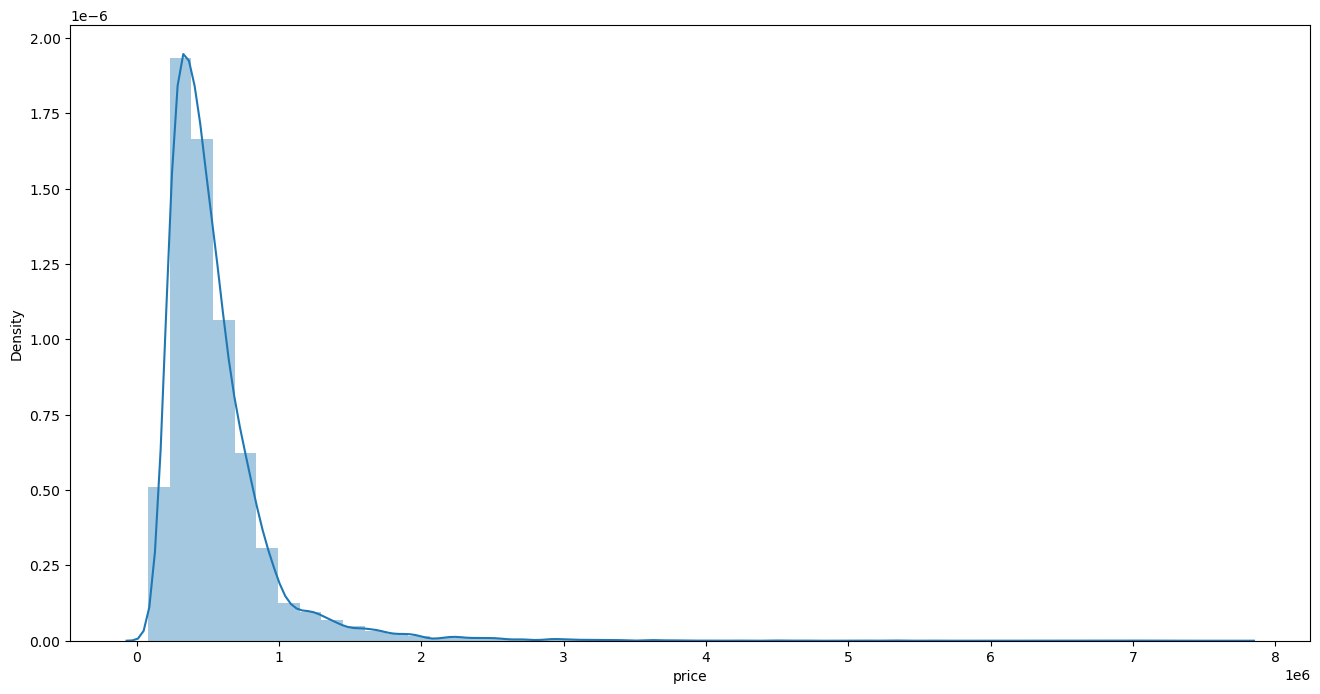

In [14]:
plt.figure(figsize=(16,8))
sns.distplot(df['price'])


<Axes: xlabel='bedrooms', ylabel='count'>

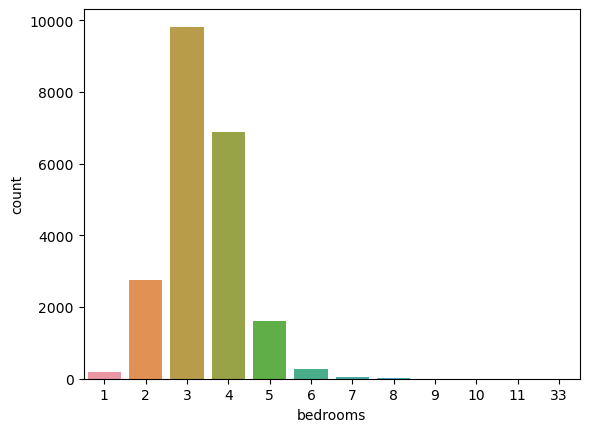

In [19]:
sns.countplot(x = df['bedrooms'])

In [21]:
df2 = df.drop('date',axis=1)
df2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [23]:
df2.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

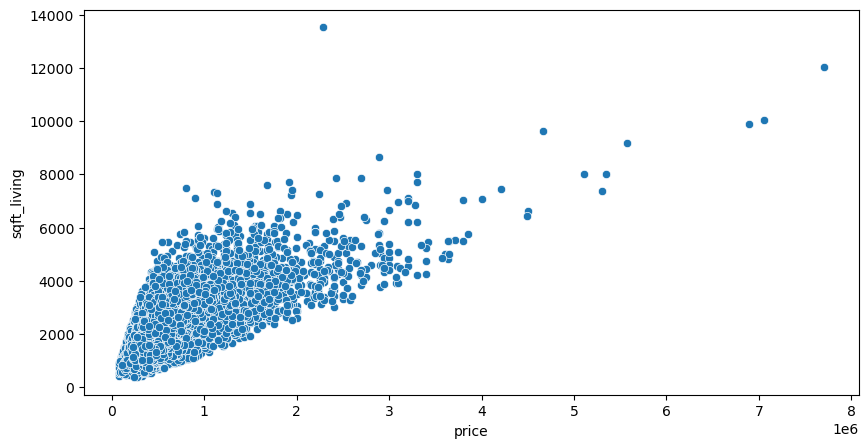

In [24]:


sns.scatterplot(x= 'price', y = 'sqft_living', data = df)

<Axes: xlabel='bedrooms', ylabel='price'>

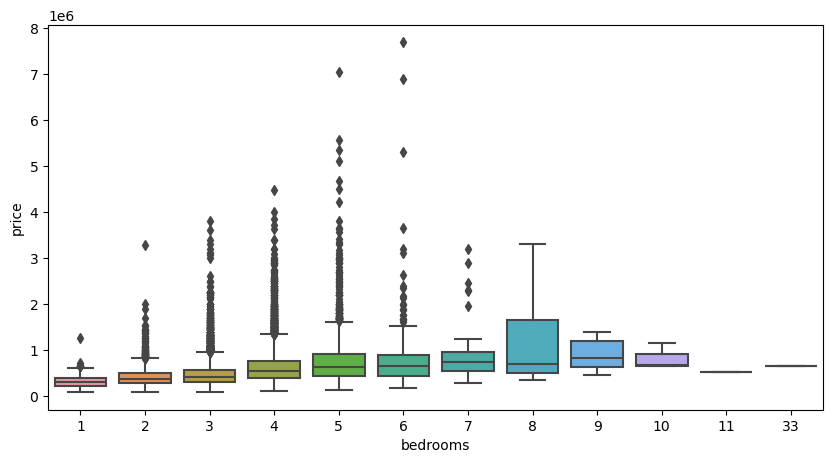

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms',y='price', data = df)

In [28]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
df['lat']

0        47.5112
1        47.7210
2        47.7379
3        47.5208
4        47.6168
          ...   
21592    47.6993
21593    47.5107
21594    47.5944
21595    47.5345
21596    47.5941
Name: lat, Length: 21597, dtype: float64

<Axes: xlabel='price', ylabel='lat'>

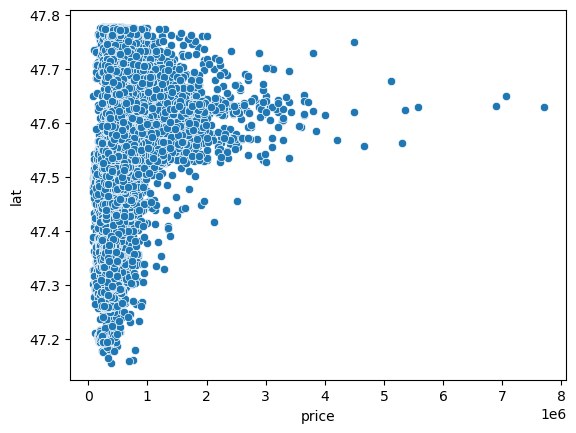

In [31]:

sns.scatterplot(x= 'price', y = 'lat', data = df)

<Axes: xlabel='price', ylabel='long'>

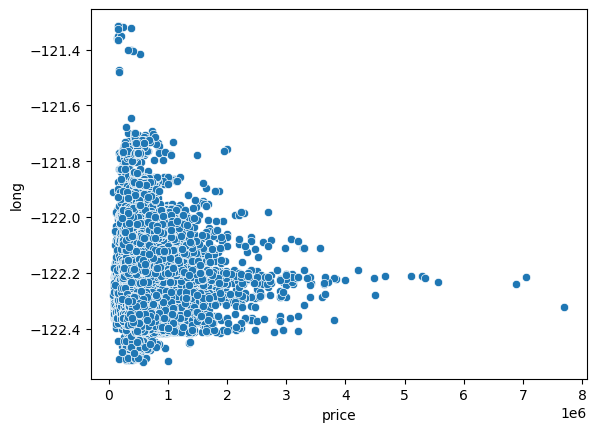

In [32]:

sns.scatterplot(x= 'price', y = 'long', data = df)

<Axes: xlabel='long', ylabel='lat'>

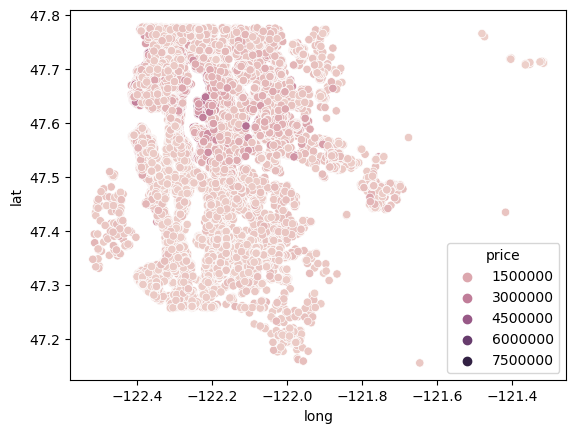

In [34]:

sns.scatterplot(x= 'long', y = 'lat', data = df, hue = 'price')

In [35]:
# top 20 priced houses

df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [36]:
len(df)

21597

In [37]:
21597 *0.01

215.97

In [38]:
non_top_1pct = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

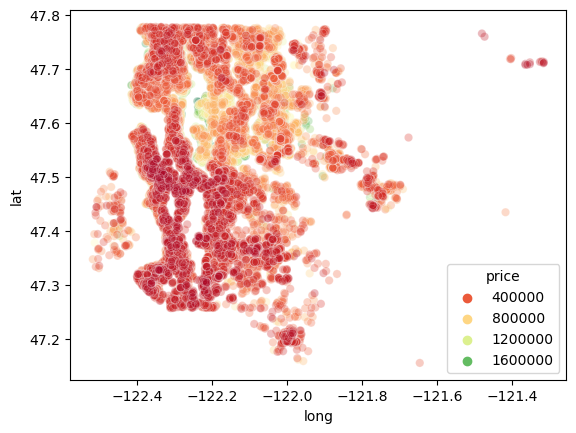

In [42]:
sns.scatterplot(x= 'long', y = 'lat', data = non_top_1pct, hue = 'price', palette='RdYlGn', alpha=0.3)

<Axes: xlabel='waterfront', ylabel='price'>

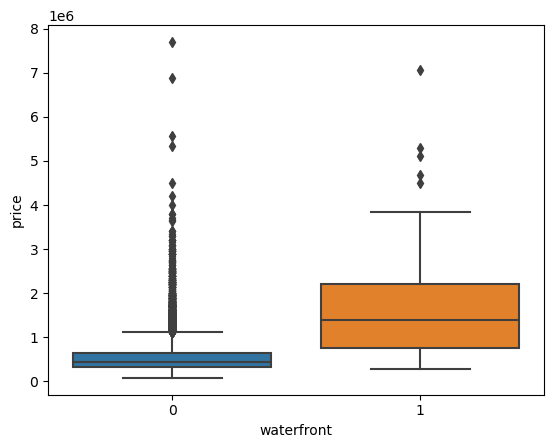

In [43]:
sns.boxplot(x='waterfront',y='price',data=df)

In [44]:

# 4. Feature Engineering

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [45]:
df = df.drop('id',axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [48]:
df['date'] = pd.to_datetime(df['date'])


In [49]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [50]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


<Axes: xlabel='month', ylabel='price'>

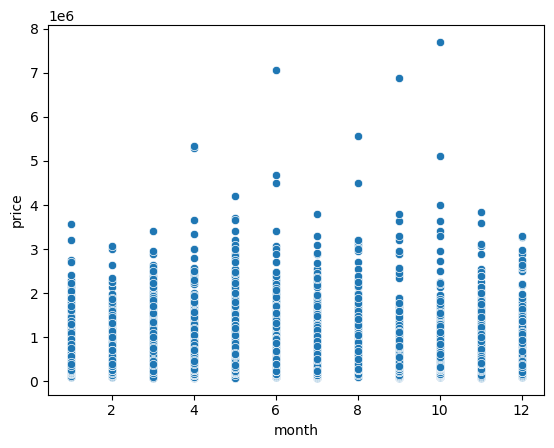

In [54]:
sns.scatterplot(x='month',y='price',data = df)

<Axes: xlabel='year', ylabel='price'>

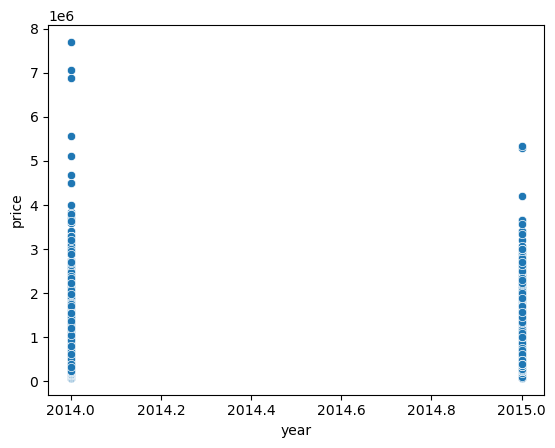

In [55]:
sns.scatterplot(x='year',y='price',data = df)

In [56]:
df = df.drop('date',axis=1)

In [57]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [58]:
# zipcode

df['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

In [59]:
# data type need not be int , it is categorical , 
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [60]:
# 70 unique zipcodes know the importance by Domain knowledge

df = df.drop('zipcode',axis=1)

In [61]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [62]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [63]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [64]:
# traintest splitting of data

from sklearn.model_selection import train_test_split
X = df.drop('price',axis=1).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03,
        1.000e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [65]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [66]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
X_train

array([[0.3       , 0.08      , 0.19855222, ..., 0.00657863, 0.        ,
        0.72727273],
       [0.2       , 0.28      , 0.1302999 , ..., 0.00288289, 0.        ,
        0.45454545],
       [0.3       , 0.48      , 0.25646329, ..., 0.00588823, 1.        ,
        0.36363636],
       ...,
       [0.1       , 0.2       , 0.14788004, ..., 0.00786147, 1.        ,
        0.27272727],
       [0.2       , 0.24      , 0.11685626, ..., 0.01557367, 1.        ,
        0.27272727],
       [0.1       , 0.08      , 0.08169597, ..., 0.00515118, 1.        ,
        0.        ]])

In [68]:
X_train.shape

(15117, 19)

In [126]:
# model building 


model = Sequential()

model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(1))


In [127]:
model.compile(optimizer="adam", loss="mse")

In [128]:
model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 438052487168.0000 - val_loss: 418950316032.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 426109960192.0000 - val_loss: 416714784768.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 430041235456.0000 - val_loss: 392362295296.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 384418906112.0000 - val_loss: 295721861120.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 263642906624.0000 - val_loss: 145699192832.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 128123166720.0000 - val_loss: 96392044544.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 102189850624.0000 - val_loss: 94167367680.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 97509695488.0000 - val_loss: 92657532928.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 98490130432.0000 - val_loss: 91192664064.0000
Epoch 10/

In [129]:
model.history.history

{'loss': [430245773312.0,
  429624590336.0,
  419560128512.0,
  363118821376.0,
  227777314816.0,
  116626513920.0,
  98318999552.0,
  96558702592.0,
  94958346240.0,
  93332062208.0,
  91669438464.0,
  89955074048.0,
  88173518848.0,
  86346252288.0,
  84422057984.0,
  82431221760.0,
  80346112000.0,
  78282940416.0,
  75995209728.0,
  73747857408.0,
  71399546880.0,
  69006098432.0,
  66593316864.0,
  64262479872.0,
  62032072704.0,
  59886161920.0,
  57944248320.0,
  56229638144.0,
  54700691456.0,
  53442363392.0,
  52338089984.0,
  51398787072.0,
  50608783360.0,
  49915150336.0,
  49245626368.0,
  48685051904.0,
  48103059456.0,
  47594983424.0,
  47033450496.0,
  46569996288.0,
  46053535744.0,
  45582045184.0,
  45118373888.0,
  44687966208.0,
  44278272000.0,
  43879251968.0,
  43494240256.0,
  43130437632.0,
  42785423360.0,
  42417352704.0,
  42083717120.0,
  41750982656.0,
  41513025536.0,
  41202085888.0,
  40949555200.0,
  40685821952.0,
  40413818880.0,
  40175939584.0,


In [130]:
losses = model.history.history

In [131]:
losses

{'loss': [430245773312.0,
  429624590336.0,
  419560128512.0,
  363118821376.0,
  227777314816.0,
  116626513920.0,
  98318999552.0,
  96558702592.0,
  94958346240.0,
  93332062208.0,
  91669438464.0,
  89955074048.0,
  88173518848.0,
  86346252288.0,
  84422057984.0,
  82431221760.0,
  80346112000.0,
  78282940416.0,
  75995209728.0,
  73747857408.0,
  71399546880.0,
  69006098432.0,
  66593316864.0,
  64262479872.0,
  62032072704.0,
  59886161920.0,
  57944248320.0,
  56229638144.0,
  54700691456.0,
  53442363392.0,
  52338089984.0,
  51398787072.0,
  50608783360.0,
  49915150336.0,
  49245626368.0,
  48685051904.0,
  48103059456.0,
  47594983424.0,
  47033450496.0,
  46569996288.0,
  46053535744.0,
  45582045184.0,
  45118373888.0,
  44687966208.0,
  44278272000.0,
  43879251968.0,
  43494240256.0,
  43130437632.0,
  42785423360.0,
  42417352704.0,
  42083717120.0,
  41750982656.0,
  41513025536.0,
  41202085888.0,
  40949555200.0,
  40685821952.0,
  40413818880.0,
  40175939584.0,


In [132]:
losses = pd.DataFrame(model.history.history)

<Axes: >

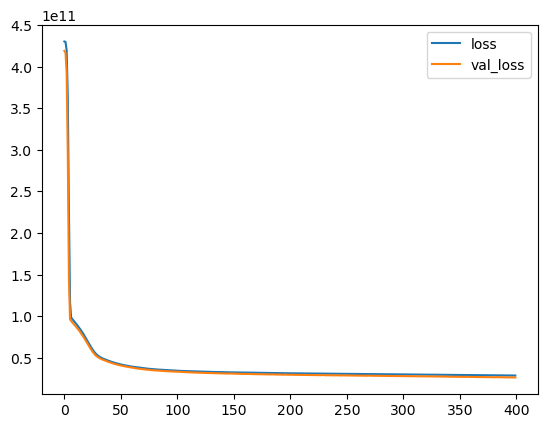

In [133]:
losses.plot()

In [134]:
# model evaluation

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
mse

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


26477094591.4239

In [135]:
np.sqrt(y_test,predictions)

ValueError: non-broadcastable output operand with shape (6480,1) doesn't match the broadcast shape (6480,6480)

In [136]:
mean_absolute_error(y_test,predictions)

100909.14085407021

In [137]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [138]:
5.402966e+05

540296.6

In [139]:
explained_variance_score(y_test,predictions)

0.8006434764624366

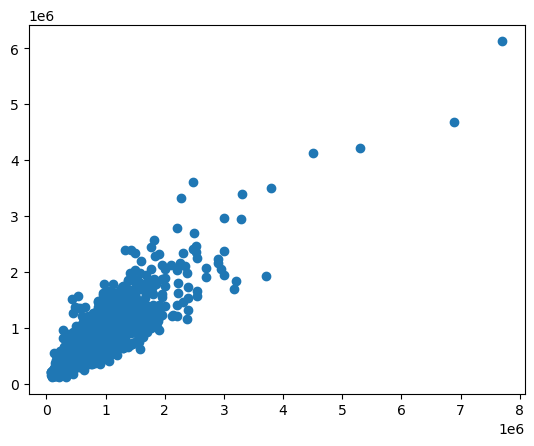

In [140]:
plt.scatter(y_test,predictions)

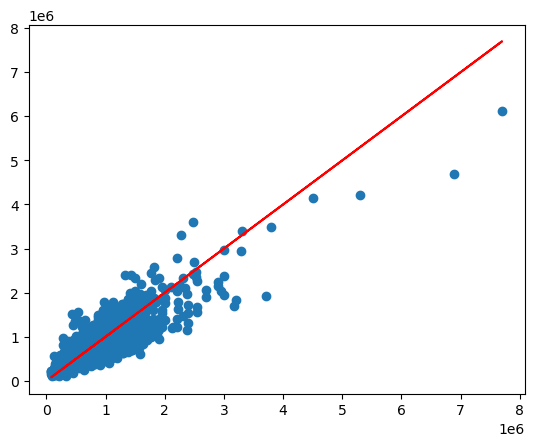

In [141]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [142]:
# Future predictions

single_house = df.drop('price',axis=1).iloc[0]


In [143]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [144]:
sh = single_house.values.reshape(-1,19)

In [145]:
scaler.transform(sh)

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [146]:
model.predict(sh)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[4.3061504e+09]], dtype=float32)

In [147]:
4.1384364e+09

4138436400.0

In [148]:
df['price'].iloc[0]

221900.0